In [1]:
from functions import*
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
# NOTE: the next import is only valid 
# for scikit-learn version <= 0.17
# if you are using scikit-learn >= 0.18 then use this:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

C:\Users\Lim\Anaconda3\envs\udacity\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Read in car and non-car images
vehicle_path = []
nonveh_path = []
nonveh_path.append('../database/non-vehicles/Extra/*.png')
nonveh_path.append('../database/non-vehicles/GTI/*.png')
vehicle_path.append('../database/vehicles/GTI_Far/*.png')
vehicle_path.append('../database/vehicles/GTI_Left/*.png')
vehicle_path.append('../database/vehicles/GTI_MiddleClose/*.png')
vehicle_path.append('../database/vehicles/GTI_Right/*.png')
vehicle_path.append('../database/vehicles/KITTI_extracted/*.png')

cars = []
notcars = []

for filepath in nonveh_path:
    images = glob.glob(filepath)
    for image in images:
        notcars.append(image)
        
for filepath in vehicle_path:
    images = glob.glob(filepath)
    for image in images:
        cars.append(image)       
        

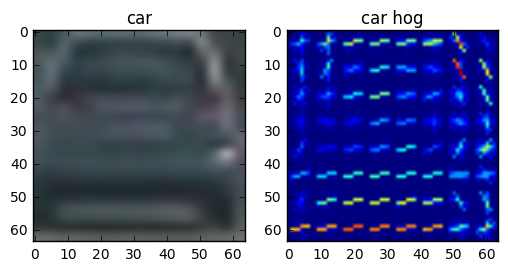

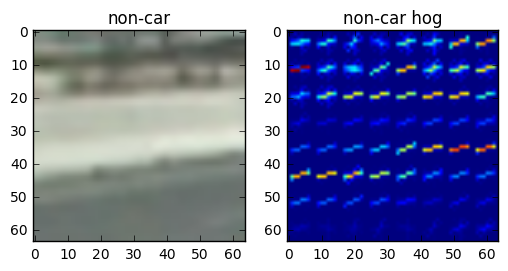

In [18]:
# Example image for HOG
car_img = mpimg.imread(cars[10])
feature, car_img_hog = get_hog_features( car_img[:,:,0],orient=9, pix_per_cell=8, cell_per_block=2, vis=True)
ncar_img = mpimg.imread(notcars[10])
nfeature, ncar_img_hog = get_hog_features( ncar_img[:,:,0],orient=9, pix_per_cell=8, cell_per_block=2, vis=True)



plt.subplot(1,2,1)
plt.imshow(car_img)
plt.title('car')
plt.subplot(1,2,2)
plt.imshow(car_img_hog)
plt.title('car hog')
plt.show()

plt.subplot(1,2,1)
plt.imshow(ncar_img)
plt.title('non-car')
plt.subplot(1,2,2)
plt.imshow(ncar_img_hog)
plt.title('non-car hog')
plt.show()




In [ ]:
### TODO: Tweak these parameters and see how the results change.
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)



X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.1, random_state=rand_state)

In [ ]:
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

In [ ]:
# Save training data
data = { 'svc': svc,
        'scaler': X_scaler,
        'color_space': color_space,
        'orient':orient,
        'pix_per_cell':pix_per_cell,
        'cell_per_block': cell_per_block,
        'hog_channel':hog_channel,
        'spatial_size':spatial_size,
        'hist_bins':hist_bins,
        'spatial_feat':spatial_feat,
        'hist_feat':hist_feat,
        'hog_feat': hog_feat
       }


f = open('model.p', 'wb')
import pickle
pickle.dump(data, f)
